In [22]:
# --- Setup ---
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure outputs/ folder exists
os.makedirs("../outputs", exist_ok=True)

# --- Load dataset ---
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# --- Grouped attrition rates ---
attrition_by_department = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)
attrition_by_jobrole = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)
attrition_by_overtime = df.groupby('OverTime')['Attrition'].mean()
attrition_by_jobsatisfaction = df.groupby('JobSatisfaction')['Attrition'].mean()

# --- Save results as CSV ---
attrition_by_department.to_csv('../outputs/attrition_by_department.csv')
attrition_by_jobrole.to_csv('../outputs/attrition_by_jobrole.csv')
attrition_by_overtime.to_csv('../outputs/attrition_by_overtime.csv')
attrition_by_jobsatisfaction.to_csv('../outputs/attrition_by_jobsatisfaction.csv')

# --- Plots ---
plt.figure(figsize=(12,6))
sns.barplot(x='JobRole', y='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition Rate by Job Role")
plt.tight_layout()
plt.savefig('../outputs/attrition_by_jobrole.png')
plt.close()

plt.figure(figsize=(8,5))
sns.barplot(x='Department', y='Attrition', data=df)
plt.title("Attrition Rate by Department")
plt.tight_layout()
plt.savefig('../outputs/attrition_by_department.png')
plt.close()

plt.figure(figsize=(6,4))
sns.barplot(x='OverTime', y='Attrition', data=df)
plt.title("Attrition Rate by OverTime")
plt.tight_layout()
plt.savefig('../outputs/attrition_by_overtime.png')
plt.close()

plt.figure(figsize=(8,5))
sns.barplot(x='JobSatisfaction', y='Attrition', data=df)
plt.title("Attrition Rate by Job Satisfaction")
plt.tight_layout()
plt.savefig('../outputs/attrition_by_jobsatisfaction.png')
plt.close()


In [23]:
import pandas as pd

df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [24]:
factors = ['Department', 'JobRole', 'OverTime', 'JobSatisfaction', 
           'WorkLifeBalance', 'YearsAtCompany', 'Age', 'MonthlyIncome']


By Department:

In [25]:
attr_dept = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)
print(attr_dept)


Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Attrition, dtype: float64


By Tenure Range:

In [26]:
df['TenureGroup'] = pd.cut(df['YearsAtCompany'], bins=[0,2,5,10,40], labels=["<2y","2-5y","5-10y","10+y"])
print(df.groupby('TenureGroup')['Attrition'].mean())


TenureGroup
<2y      0.288591
2-5y     0.138249
5-10y    0.122768
10+y     0.081301
Name: Attrition, dtype: float64


By JobSatisfaction:

In [27]:
print(df.groupby('JobSatisfaction')['Attrition'].mean())


JobSatisfaction
1    0.228374
2    0.164286
3    0.165158
4    0.113290
Name: Attrition, dtype: float64


Visualize to Spot Bottlenecks

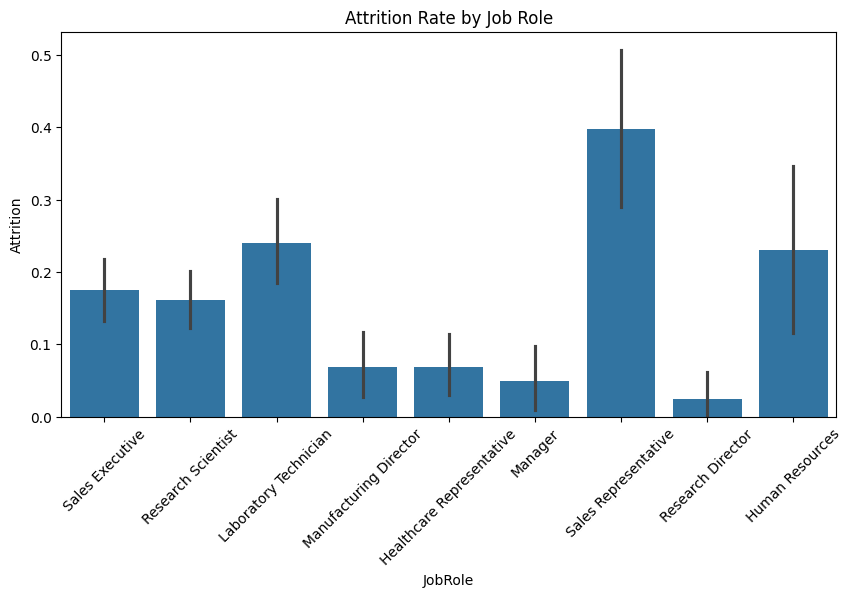

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='JobRole', y='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Rate by Job Role')
plt.show()



Attrition Rate by Department

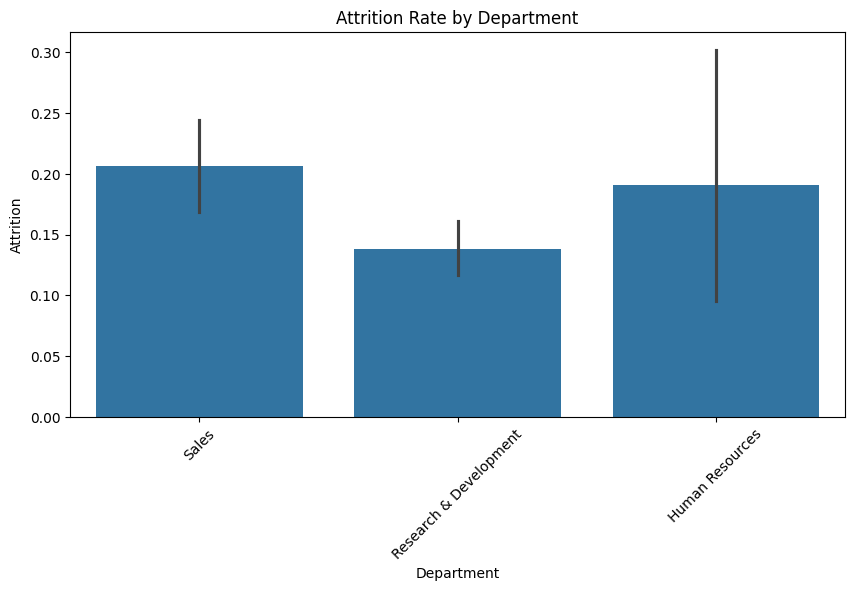

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Department', y='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Rate by Department')
plt.show()

In [30]:
Attrition Rate by Tenure Group 


SyntaxError: invalid syntax (3132194188.py, line 1)

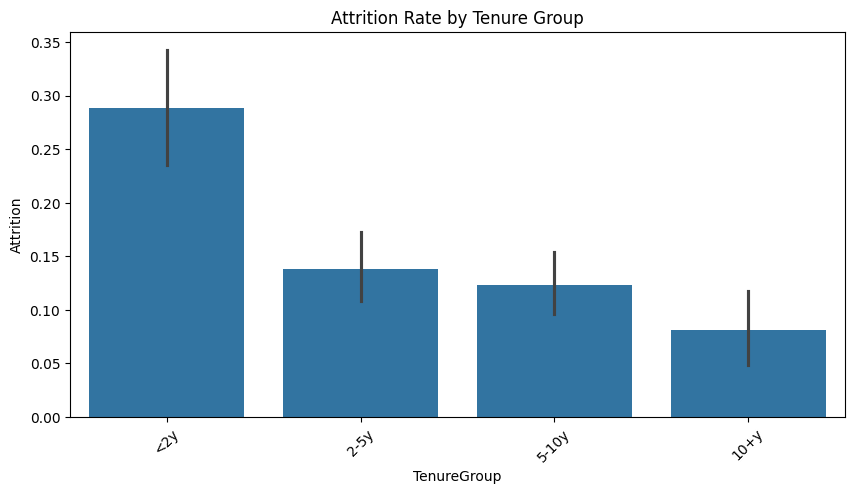

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='TenureGroup', y='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Rate by Tenure Group')
plt.show()

Attrition Rate by Job Satisfaction

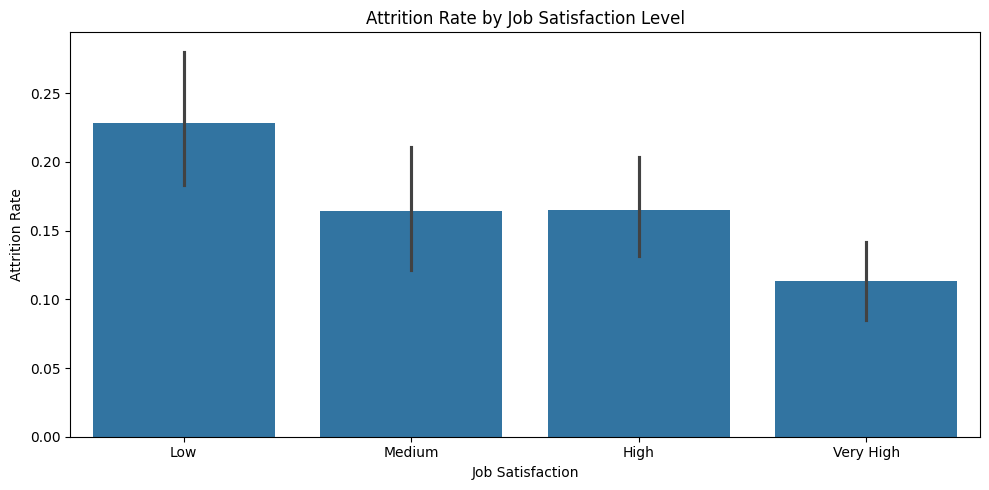

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, map JobSatisfaction scores to labels
satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['JobSatisfactionLabel'] = df['JobSatisfaction'].map(satisfaction_map)

# Now plot using the labeled column
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='JobSatisfactionLabel', y='Attrition', order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Attrition Rate by Job Satisfaction Level')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.tight_layout()
plt.show()
